# Frame Skip Comparison

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

PATH = ""
skip_1 = f"racetrack_frame_skip_1/reward_0.csv"
skip_2 = f"racetrack_frame_skip_2/reward_0.csv"
skip_4 = f"racetrack_frame_skip_4/reward_0.csv"
skip_8 = f"racetrack_frame_skip_8/reward_0.csv"


skip_1 = pd.read_csv(skip_1)
skip_2 = pd.read_csv(skip_2)
skip_4 = pd.read_csv(skip_4)
skip_8 = pd.read_csv(skip_8)
skip_8["steps"] *= 10
skip_1 = skip_1[skip_1['steps'] > 200e3]
skip_2 = skip_2[skip_2['steps'] > 200e3]
skip_4 = skip_4[skip_4['steps'] > 200e3]
skip_8 = skip_8[skip_8['steps'] > 0]
skip_1["steps"] = skip_1["steps"] - skip_1["steps"].min()
skip_2["steps"] = skip_2["steps"] - skip_2["steps"].min()
skip_4["steps"] = skip_4["steps"] - skip_4["steps"].min()
skip_8["steps"] = skip_8["steps"] - skip_8["steps"].min()

skip_1 = skip_1.sample(frac=0.1)
skip_2 = skip_2.sample(frac=0.1)
skip_4 = skip_4.sample(frac=0.1)
skip_8 = skip_8.sample(frac=0.1)
skip_1.sort_values(by='steps', inplace=True)
skip_2.sort_values(by='steps', inplace=True)
skip_4.sort_values(by='steps', inplace=True)
skip_8.sort_values(by='steps', inplace=True)
skip_8.head()


,steps,reward,lenght
31,15450,-63.349275,75
56,31340,-58.688793,75
70,40420,-34.671291,75
83,48020,-12.343230,75
85,48510,10.000000,1


## Plot

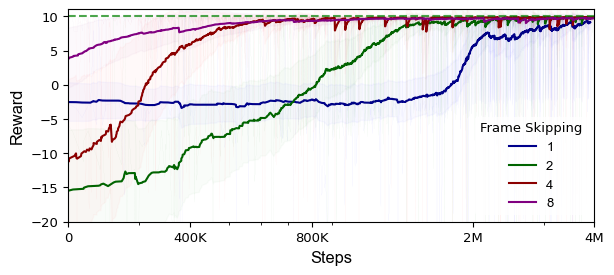

In [7]:
plt.rcParams['agg.path.chunksize'] = 10000

# skip_1 = skip_1[skip_1['steps'] < 1.5e6]
# skip_1_2 = skip_1[skip_1['steps'] > 1.5e6]

fig = plt.figure(figsize=(17.25/2.54, 7/2.54))
bax = plt.axes(
                #  xlims=((200e3, 2e6)),
                #  ylims=((-20, 11)),
                #  wspace=0.050,
                #  hspace=0.050,
                #  width_ratios=[1],
                #  height_ratios=[1], 
                #  despine=False, 
                #  d=0.015
                 )
alpha = 0.008  # Increase alpha for faster plotting

# Calculate EWMA
skip_1_ewma = skip_1['reward'].ewm(alpha=alpha).mean()
# skip_1_ewma = skip_1['reward'].ewm(alpha=alpha).mean()
# skip_1_2_ewma = skip_1_2['reward'].ewm(alpha=alpha).mean()
skip_2_ewma = skip_2['reward'].ewm(alpha=alpha).mean()
skip_4_ewma = skip_4['reward'].ewm(alpha=alpha).mean()
skip_8_ewma = skip_8['reward'].ewm(alpha=alpha).mean()

bax.plot(skip_1['steps'], skip_1['reward'], alpha=0.35, color='blue', linewidth=0.03)
bax.plot(skip_1['steps'], skip_1_ewma, alpha=1, label='1', color='darkblue')

# bax.plot(skip_1_2['steps'], skip_1_2['reward'], alpha=0.25, color='blue', linewidth=0.04)
# bax.plot(skip_1_2['steps'], skip_1_2_ewma, alpha=1, color='darkblue')

bax.plot(skip_2['steps'], skip_2['reward'], alpha=0.35, color='green', linewidth=0.035)
bax.plot(skip_2['steps'], skip_2_ewma, alpha=1, label='2', color='darkgreen')

bax.plot(skip_4['steps'], skip_4['reward'], alpha=0.25, color='red', linewidth=0.035)
bax.plot(skip_4['steps'], skip_4_ewma, alpha=1, label='4', color='darkred')

bax.plot(skip_8['steps'], skip_8['reward'], alpha=0.25, color='purple', linewidth=0.035)
bax.plot(skip_8['steps'], skip_8_ewma, alpha=1, label='8', color='purple')

# Calculate 1/3 standard deviation
skip_1_std = skip_1['reward'].ewm(alpha=alpha).std() / 3
skip_2_std = skip_2['reward'].ewm(alpha=alpha).std() / 3
skip_4_std = skip_4['reward'].ewm(alpha=alpha).std() / 3
skip_8_std = skip_8['reward'].ewm(alpha=alpha).std() / 3


# Plot filled area
bax.fill_between(skip_1['steps'], skip_1_ewma - skip_1_std, skip_1_ewma + skip_1_std, color='blue', alpha=0.025)
bax.fill_between(skip_2['steps'], skip_2_ewma - skip_2_std, skip_2_ewma + skip_2_std, color='green', alpha=0.025)
bax.fill_between(skip_4['steps'], skip_4_ewma - skip_4_std, skip_4_ewma + skip_4_std, color='red', alpha=0.025)
bax.fill_between(skip_8['steps'], skip_8_ewma - skip_8_std, skip_8_ewma + skip_8_std, color='purple', alpha=0.025)

bax.axhline(y=10, color='green', linestyle='--', alpha=0.7)

bax.tick_params(axis='both', which='major', labelsize=24/2.54)
bax.set_xlabel('Steps', fontname='Arial', fontsize=30/2.54,)
bax.set_ylabel('Reward', fontname='Arial', fontsize=30/2.54,)

# bax.first_col[0].set_yticks([-20, -10, 0, 10])
# bax.first_col[0].set_yticklabels(['-20', '-10', '0', '10'])
# bax.set_title("Comparison Flow Strenght", fontname='Arial', fontsize=20)


bax.set_xlim(200e3, 4e6)
bax.set_xscale('log')
bax.set_ylim(-20, 11)
bax.set_xticks([200e3, 400e3, 800e3, 2e6, 4e6])
bax.set_xticklabels(['0', '400K', '800K', '2M', '4M',])
# bax.last_row[1].set_xticks([5.5e6, 6.5e6,])
# bax.last_row[1].set_xticklabels(['5M', '7M',])

legend = bax.legend(prop={'family': 'Arial', 'size': 24/2.54}, loc='lower right', title='Frame Skipping', title_fontsize=24/2.54)
legend.get_frame().set_edgecolor('none')
plt.savefig(f'frame_skip_comparison_racetrack_logscale.png', dpi=300, bbox_inches='tight')
